In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from sklearn.tree import export_graphviz

# 나무구조 시각화 (.dot 확장자 파일 불러오기 등)
import graphviz

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor

# 최적모델, 파라미터 검색
from sklearn.model_selection import GridSearchCV


# 회귀분석
import statsmodels.formula.api as smf

# Decision Tree
from sklearn.tree import DecisionTreeRegressor

# Random Forest
from sklearn.ensemble import RandomForestRegressor as RFR

# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor as GBR

#평가함수 2개 MSE, MAE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# 시간 자료를 핸들링 할 수 있는 라이브러리
import datetime as dt

# 회귀분석
from statsmodels.formula.api import ols

# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant

# 선형모델 formula(y ~ X1 + X2 + ...)
import statsmodels.formula.api as smf

# 평가함수
from statsmodels.tools.eval_measures import rmse

# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 선형회귀모형
from sklearn.linear_model import LinearRegression

# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE

# 회귀계수들의 Scale 변환 -> 표준화 회귀계수 산출. 이건 coef가 곧 weight 값이 되는데, scale이 큰 놈들에게 coef 영향이 커지기 때문에, 이러한 경우 스케일 조정이 필요하다. 하지만 여기서 할 필요는 없다.
from sklearn.preprocessing import StandardScaler

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz

# 나무구조 시각화 (.dot 확장자 파일 불러오기 등)
import graphviz

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor

# 최적모델, 파라미터 검색
from sklearn.model_selection import GridSearchCV


# 회귀분석
import statsmodels.formula.api as smf

# Decision Tree
from sklearn.tree import DecisionTreeRegressor

# Random Forest
from sklearn.ensemble import RandomForestRegressor as RFR

# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor as GBR

#평가함수 2개 MSE, MAE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Scale 변환
from sklearn.preprocessing import StandardScaler

# 주성분 분석
from sklearn.decomposition import PCA

#회귀분석
import statsmodels.api as sm


import warnings
warnings.filterwarnings(action='ignore')


matplotlib.rc('font', family = 'NanumGothic')
matplotlib.rc('axes', unicode_minus = False)

In [2]:
# sklearn에서 평가함수 rmse, mape를 지원하지 않는다. 이걸 만들어주자.

# RMSE: root mean squared error
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# MAPE: mean absolute percentage error
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# 데이터 가져오기 및 Cleansing (결측치 확인 및 처리, 데이터 전처리)

In [3]:
df_raw = pd.read_csv('./AIR_POLLUTION.csv')
df_raw

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
0,2019-07-01,29.0,0.054,0.021,0.5,0.003,24.03,0.00,2.30,249,63.2,995.1,0.0,5.70
1,2019-07-02,26.0,0.053,0.020,0.5,0.003,24.29,0.00,2.26,265,63.2,998.6,0.0,3.83
2,2019-07-03,30.0,0.042,0.023,0.4,0.003,24.18,0.00,1.79,280,65.3,998.3,0.0,6.29
3,2019-07-04,28.0,0.034,0.026,0.4,0.003,25.35,0.00,2.04,263,58.6,996.6,0.0,2.54
4,2019-07-05,29.0,0.045,0.035,0.5,0.003,27.30,0.00,1.45,175,45.5,993.5,0.0,3.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2020-06-26,19.0,0.039,0.016,0.4,0.003,21.66,0.41,3.12,228,84.0,996.0,0.0,8.73
362,2020-06-27,22.0,0.044,0.017,0.4,0.004,23.94,0.00,1.93,217,69.8,995.8,0.0,6.21
363,2020-06-28,27.0,0.044,0.009,0.4,0.003,25.03,0.00,2.35,283,71.3,994.7,0.0,2.63
364,2020-06-29,36.0,0.026,0.028,0.6,0.003,24.06,1.26,2.48,103,75.5,992.9,0.0,7.58


#### 방향 정보값 추가

In [4]:
def direction_devider(x):
    if x < 15 or x > 345:
        return 'N'
    elif x < 45:
        return 'NNE'
    elif x < 75:
        return 'NE'
    elif x < 105:
        return 'E'
    elif x < 135:
        return 'SE'
    elif x < 165:
        return 'SSE'
    elif x < 195:
        return 'S'
    elif x < 225:
        return 'SW'
    elif x < 255:
        return 'SSW'
    elif x < 285:
        return 'W'
    elif x < 315:
        return 'NW'
    elif x < 345:
        return 'NNW'
    else:
        return 'N'

In [5]:
df_raw['direction'] = df_raw.WIND_DIR.apply(direction_devider)

In [6]:
# select_dtypes: 특정 변수 타입을 선택/제외하여 데이터 추출
df_un_numeric = df_raw.iloc[:, 0: 2]

df_numeric = df_raw.iloc[:, 2:-1]

df_direction = df_raw.iloc[:,-1]

# Data Scaling
scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns = df_numeric.columns)

# 문자 데이터 + 숫자 데이터
df_scaled = pd.concat([df_un_numeric, df_numeric_scaled, df_direction],axis = 1)
df_scaled.head()

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD,direction
0,2019-07-01,29.0,2.558984,-0.566824,-0.111696,-0.052053,1.035588,-0.340569,0.103436,0.559883,0.200131,-1.324456,-0.103356,0.213272,SSW
1,2019-07-02,26.0,2.474806,-0.664322,-0.111696,-0.052053,1.062073,-0.340569,0.048048,0.786389,0.200131,-0.893194,-0.103356,-0.413817,W
2,2019-07-03,30.0,1.548858,-0.371828,-0.767117,-0.052053,1.050868,-0.340569,-0.602757,0.998738,0.344807,-0.930159,-0.103356,0.411123,W
3,2019-07-04,28.0,0.875442,-0.079334,-0.767117,-0.052053,1.170051,-0.340569,-0.256584,0.758076,-0.116780,-1.139630,-0.103356,-0.846407,W
4,2019-07-05,29.0,1.801390,0.798148,-0.111696,-0.052053,1.368689,-0.340569,-1.073552,-0.487707,-1.019288,-1.521605,-0.103356,-0.383636,S


#### 결측값 조회

In [7]:
df_scaled.isnull().sum()

MeasDate      0
PM10          1
O3            1
NO2           1
CO           55
SO2           1
TEMP          0
RAIN          0
WIND          0
WIND_DIR      0
HUMIDITY      0
ATM_PRESS     0
SNOW          0
CLOUD         0
direction     0
dtype: int64

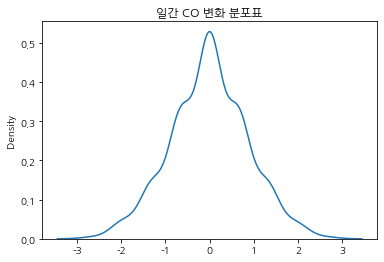

In [8]:
delta = df_scaled['CO'] - df_scaled['CO'].shift()
x = delta.values
sns.kdeplot(x)
plt.title("일간 CO 변화 분포표")
plt.show()

In [9]:
df_scaled['CO'].fillna(method='bfill', inplace= True)

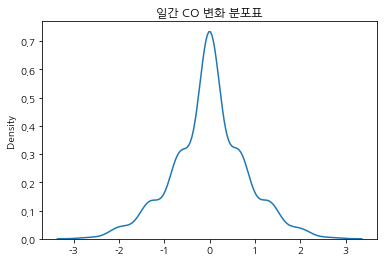

In [10]:
delta = df_scaled['CO'] - df_scaled['CO'].shift()
x = delta.values
sns.kdeplot(x)
plt.title("일간 CO 변화 분포표")
plt.show()

In [11]:
df_scaled[df_scaled['PM10'].isnull()]

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD,direction
328,2020-05-24,NaN,NaN,NaN,0.543726,NaN,0.368367,0.953388,0.865016,0.673136,1.584894,-0.79462,-0.103356,1.054978,W


In [12]:
delete_row = df_scaled[df_scaled['PM10'].isnull()].index
df_scaled.drop(delete_row, inplace= True)

In [13]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 365
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MeasDate   365 non-null    object 
 1   PM10       365 non-null    float64
 2   O3         365 non-null    float64
 3   NO2        365 non-null    float64
 4   CO         365 non-null    float64
 5   SO2        365 non-null    float64
 6   TEMP       365 non-null    float64
 7   RAIN       365 non-null    float64
 8   WIND       365 non-null    float64
 9   WIND_DIR   365 non-null    float64
 10  HUMIDITY   365 non-null    float64
 11  ATM_PRESS  365 non-null    float64
 12  SNOW       365 non-null    float64
 13  CLOUD      365 non-null    float64
 14  direction  365 non-null    object 
dtypes: float64(13), object(2)
memory usage: 45.6+ KB


## 년-월-일로 나온 MeasDate 열을 연, 월, 일 별도의 열로 분리토록 하자

In [14]:
df_scaled['DateInfo'] = pd.to_datetime(df_raw['MeasDate'], infer_datetime_format= True)
df_scaled['Year'] = df_scaled['DateInfo'].dt.year
df_scaled['Month'] = df_scaled['DateInfo'].dt.month
df_scaled[['MeasDate','Year','Month']]

df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 365
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   MeasDate   365 non-null    object        
 1   PM10       365 non-null    float64       
 2   O3         365 non-null    float64       
 3   NO2        365 non-null    float64       
 4   CO         365 non-null    float64       
 5   SO2        365 non-null    float64       
 6   TEMP       365 non-null    float64       
 7   RAIN       365 non-null    float64       
 8   WIND       365 non-null    float64       
 9   WIND_DIR   365 non-null    float64       
 10  HUMIDITY   365 non-null    float64       
 11  ATM_PRESS  365 non-null    float64       
 12  SNOW       365 non-null    float64       
 13  CLOUD      365 non-null    float64       
 14  direction  365 non-null    object        
 15  DateInfo   365 non-null    datetime64[ns]
 16  Year       365 non-null    int64         
 1

# EDA

## 1. 상관관계 분석

In [15]:
df_scaled.corr()

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD,Year,Month
PM10,1.000000,-0.051763,0.395969,0.629420,0.428685,-0.309786,-0.121444,-0.100323,0.019949,-0.149803,0.253023,-0.020007,-0.172230,0.274266,-0.201365
O3,-0.051763,1.000000,-0.591658,-0.497763,-0.234127,0.516257,-0.103903,0.165216,0.268680,-0.037699,-0.534372,0.003900,-0.119307,0.179153,-0.156888
NO2,0.395969,-0.591658,1.000000,0.752197,0.563432,-0.237406,0.029298,-0.536649,-0.408342,-0.065514,0.420292,-0.120893,0.016722,-0.202632,0.190823
CO,0.629420,-0.497763,0.752197,1.000000,0.588514,-0.547358,-0.048135,-0.266187,-0.273337,-0.099831,0.518304,-0.028660,-0.083855,0.110160,-0.033845
SO2,0.428685,-0.234127,0.563432,0.588514,1.000000,-0.273629,-0.128750,-0.252864,-0.093200,-0.302278,0.333995,-0.102927,-0.191234,0.026455,0.003498
TEMP,-0.309786,0.516257,-0.237406,-0.547358,-0.273629,1.000000,0.077361,-0.216042,-0.050394,0.404147,-0.792079,-0.184503,0.341553,-0.309993,0.232859
RAIN,-0.121444,-0.103903,0.029298,-0.048135,-0.128750,0.077361,1.000000,0.125901,-0.183431,0.396637,-0.235577,0.019391,0.357903,-0.103493,0.083273
WIND,-0.100323,0.165216,-0.536649,-0.266187,-0.252864,-0.216042,0.125901,1.000000,0.235237,-0.084299,-0.053769,0.145803,0.016841,0.305982,-0.188682
WIND_DIR,0.019949,0.268680,-0.408342,-0.273337,-0.093200,-0.050394,-0.183431,0.235237,1.000000,-0.098825,0.067591,0.108013,-0.296964,0.062941,-0.020444
HUMIDITY,-0.149803,-0.037699,-0.065514,-0.099831,-0.302278,0.404147,0.396637,-0.084299,-0.098825,1.000000,-0.510358,0.021658,0.627970,-0.200765,0.167530


    O3의 경우 PM10과 상관계수는 매우 낮으면서 나머지 오염유발 물질과 상관관계는 매우 높았다. 이는 다중공선성으로 인해 회귀분석에 부정적 영향을 줄 수 있으므로, 후에 기단 관련 파생변수를 만들 경우를 고려해 우선 배제토록 하자.

In [16]:
df_compare = df_scaled.groupby('Year')[['PM10','O3','NO2','CO','SO2']].agg(['mean', 'std', 'min', 'max'])
df_compare

PM10                               O3                      \
           mean        std  min    max      mean       std       min   
Year                                                                   
2019  29.092391  15.498181  5.0  101.0 -0.177687  1.062362 -1.818225   
2020  37.823204  15.193629  6.0   92.0  0.180632  0.902923 -1.734048   

                     NO2                                     CO            \
           max      mean       std       min       max     mean       std   
Year                                                                        
2019  3.148223  0.200973  0.981197 -1.444307  3.138101 -0.32542  1.153108   
2020  3.232400 -0.204304  0.982713 -1.834299  2.455615 -0.09359  0.930583   

                               SO2                                
           min       max      mean       std       min       max  
Year                                                              
2019 -1.422538  3.165411 -0.026239  0.999650 -1.635332  3.114506  
2020 -1.422538  2.509990  0.026674  1.005188 -1.635332  3.114506

<AxesSubplot:>

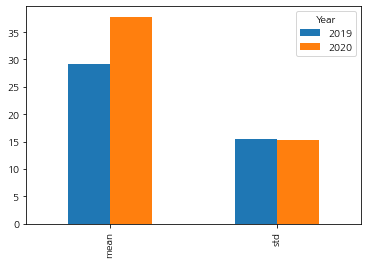

In [17]:
df_compare['PM10'][['mean', 'std']].T.plot.bar()

    가설 중 코로나 Impact에 대해 고려해보자고 하였다. 코로나의 세계적 유행(데이터 상 2020년) 시기와 유행 이전 전년 동월(2019년)과 데이터에 대해 유의미한 차이가 존재하는지 통계적 기법을 바탕으로 확인해보도록 하자.

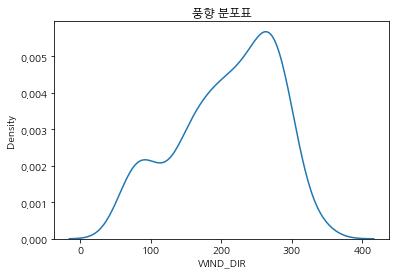

In [18]:
sns.kdeplot(df_raw['WIND_DIR'])
plt.title("풍향 분포표")
plt.show()

    보다시피 대한민국은 편서풍의 영향을 크게 받는 나라이다. 북쪽 0도를 기준으로, 180도 이상인 바람이 주를 이루고 있다.
    한편 90도 내외에서의 혹을 보면 동풍의 분포 또한 존재함을 비춰볼 수 있는데, 이는 여름철 고온다습한 북태평양 기단이라고 볼 수 있다.
    보다 자세히 관찰해보면, 190대에서 작은 융기 또한 존재함을 볼 수 있다. 이는 양쯔강 기단의 영향이라고 추측해볼 수 있다.
    이를 토대로, 편서풍의 영향이 강할 때 중국발 미세먼지가 영향을 미쳐 PM10이 높을 것이라 추론하였다. 산점도를 토대로 추론이 적절한지 보도록 한다.

Text(0.5, 1.0, '바람 방향에 따른 PM10 추이')

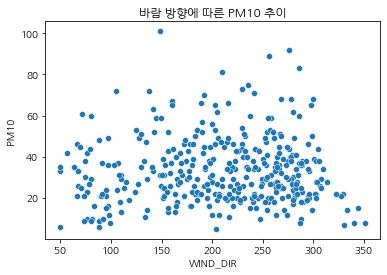

In [19]:
g = sns.scatterplot(data = df_raw, x = df_raw["WIND_DIR"], y = df_raw["PM10"])
plt.title("바람 방향에 따른 PM10 추이")

Text(0.5, 1.0, '바람 방향에 따른 PM10 추이')

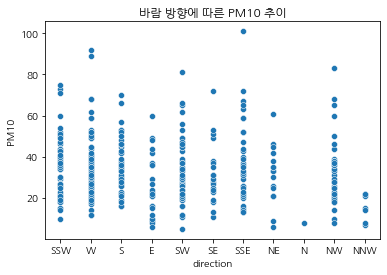

In [20]:
g = sns.scatterplot(data = df_scaled, x = df_scaled["direction"], y = df_scaled["PM10"])
plt.title("바람 방향에 따른 PM10 추이")

    남서풍, 혹은 북서풍이 불면 중국의 미세먼지의 영향으로 더 높은 PM10 수치가 나올 것이라는 가설에는 부합하지 않는 것을 볼 수 있다.
    
    일부 서풍 계열 바람(180~360)이 불 때 더 높은 수치의 PM10 지수를 띄는 것을 확인할 수는 있지만, 이분산성이 심한 것으로 모여 그대로 활용하기에는 문제가 있다.
    이를 회귀분석에 활용코자 한다면, 주성분 분석을 활용해 이분산성을 제거하면서도, 목적변수를 잘 설명할 수 있는 다른 파생 변수를 필요로 한다.

In [21]:
def direction_devider(x):
    if x < 120:
        return 0
    elif x < 200:
        return 1
    else:
        return 2

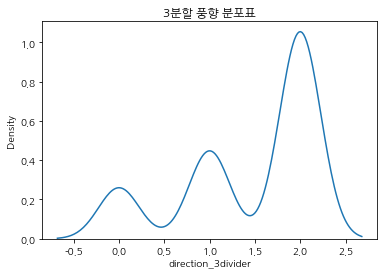

In [22]:
df_raw['direction_3divider'] = df_raw.WIND_DIR.apply(direction_devider)
df_scaled['direction_3divider'] = df_raw.WIND_DIR.apply(direction_devider)

sns.kdeplot(df_raw['direction_3divider'])
plt.title("3분할 풍향 분포표")
plt.show()


df_un_numeric = df_raw.iloc[:, 0: 2]

df_numeric = df_raw.iloc[:, 2:-1]

df_direction = df_raw.iloc[:,-1]

Text(0.5, 1.0, '바람 방향에 따른 PM10 추이')

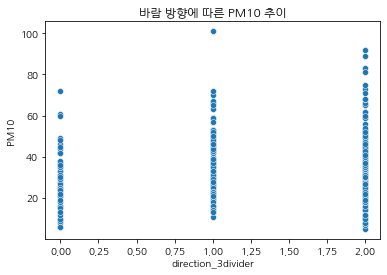

In [23]:
g = sns.scatterplot(data = df_raw, x = df_raw['direction_3divider'], y = df_raw["PM10"])
plt.title("바람 방향에 따른 PM10 추이")

    기단 별 풍향의 방향을 좀 더 크게 분류하면 그 분포에 유의미한 차이가 존재함을 볼 수 있다. 하지만 이 또한 이분산성이 다소 존재하기 때문에, 파생변수로써 활용해야 할 것으로 여겨진다.

Text(0.5, 1.0, '월별 PM10 추이')

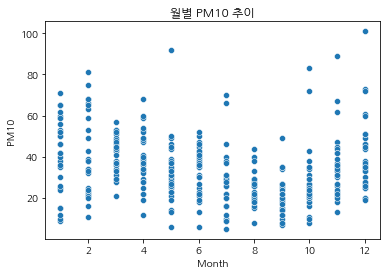

In [24]:
g = sns.scatterplot(data = df_scaled, x = df_scaled["Month"], y = df_scaled["PM10"])
plt.title("월별 PM10 추이")

    3월 봄철 미세먼지 정도가 심하다가 7월 감소하는 경향성을 보인다.
    이는 기단으로 설명이 가능하다. 서쪽에서 불어오는 양쯔강 기단과 시베리아 기단이 겨울철과 봄철에 작용하며 이로인해 중국발 미세먼지가 자주 전달되기 때문이다.
    
    회귀분석 설명변수로써 아쉬운 점은 월별로 이분산성을 갖는 것이다. 이를 해결하기 위해 기단이라는 파생변수를 만들고 기단과 관련한 여러 변수를 합쳐 이분산성을 해소해보고자 한다.

    https://air.daegu.go.kr/open_content/ko/page.do?mnu_uid=257
    19년 후반기와 20년 전반기를 비교하는 것에 다소 무리가 있을 수 있으나, 주요 도시 대기오염도 등의 지표에서 또한 코로나 이후 미세먼지의 극단적 감소가 있음을 볼 수 있었다. 반면 오존, 이산화질소, 일산화탄소, 이산화황은 그 평균의 차이가 거의 없거나 오히려 늘어난 경우를 볼 수 있다. 따라서 연도 또한 코로나 임팩트를 대체하는 변수로써 상정해 주요 설명 변수로 보도록 한다. (더미형)

## Vanilla OLS Regression without Scaling

In [25]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 365
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   MeasDate            365 non-null    object        
 1   PM10                365 non-null    float64       
 2   O3                  365 non-null    float64       
 3   NO2                 365 non-null    float64       
 4   CO                  365 non-null    float64       
 5   SO2                 365 non-null    float64       
 6   TEMP                365 non-null    float64       
 7   RAIN                365 non-null    float64       
 8   WIND                365 non-null    float64       
 9   WIND_DIR            365 non-null    float64       
 10  HUMIDITY            365 non-null    float64       
 11  ATM_PRESS           365 non-null    float64       
 12  SNOW                365 non-null    float64       
 13  CLOUD               365 non-null    float64       

In [26]:
df_scaled_y = df_scaled['PM10']
df_scaled_x = df_scaled.drop(['PM10'], axis = 1, inplace = False)

In [27]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_scaled_x, df_scaled_y,
                                           test_size = 0.3, random_state = 1234)
print(df_train_x.shape)
print(df_train_y.shape)
print(df_test_x.shape)
print(df_test_y.shape)

(255, 18)
(255,)
(110, 18)
(110,)


In [28]:
df_train, df_test = train_test_split(df_scaled, random_state= 1234)

In [29]:
# 우선 상관관계에서 본 2차 오염유발 물질 중 PM10과 상관계수가 높은 3 변수를 설명 변수로 두고 진행해보자.
formula = 'PM10 ~ CO+NO2+SO2'

reg_model = smf.ols(formula, data = df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     52.82
Date:                Wed, 09 Mar 2022   Prob (F-statistic):           7.11e-27
Time:                        17:13:57   Log-Likelihood:                -1078.6
No. Observations:                 273   AIC:                             2165.
Df Residuals:                     269   BIC:                             2180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.6921      0.814     43.833      0.0

In [30]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 365
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   MeasDate            365 non-null    object        
 1   PM10                365 non-null    float64       
 2   O3                  365 non-null    float64       
 3   NO2                 365 non-null    float64       
 4   CO                  365 non-null    float64       
 5   SO2                 365 non-null    float64       
 6   TEMP                365 non-null    float64       
 7   RAIN                365 non-null    float64       
 8   WIND                365 non-null    float64       
 9   WIND_DIR            365 non-null    float64       
 10  HUMIDITY            365 non-null    float64       
 11  ATM_PRESS           365 non-null    float64       
 12  SNOW                365 non-null    float64       
 13  CLOUD               365 non-null    float64       

In [31]:
formula = 'PM10 ~ CO+NO2+SO2+TEMP+CLOUD+C(direction_3divider)'

reg_model = smf.ols(formula, data = df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     29.59
Date:                Wed, 09 Mar 2022   Prob (F-statistic):           4.77e-30
Time:                        17:13:57   Log-Likelihood:                -1063.0
No. Observations:                 273   AIC:                             2142.
Df Residuals:                     265   BIC:                             2171.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [32]:
# SO2가 넘어갔으므로 우선 제거해주고, 추가 변수 고려
formula = 'PM10 ~ CO+NO2+TEMP+CLOUD+C(Year)+C(direction_3divider)'

reg_model = smf.ols(formula, data = df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     33.07
Date:                Wed, 09 Mar 2022   Prob (F-statistic):           7.06e-33
Time:                        17:13:57   Log-Likelihood:                -1056.1
No. Observations:                 273   AIC:                             2128.
Df Residuals:                     265   BIC:                             2157.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

    CO는 예측에 강한 영향력을 가지므로 우선 독립변수로 설정하고,
    나머지 변수들에 대해 파생변수를 고려해보도록 하자.
    가설에 따른 파생변수 계획은 다음과 같다.
    1) SO2, NO2(, 및 오존O3)를 고려할 수 있는 "2차 공해유발 물질" 변수
    2) "계절성 기단"을 구분할 수 있는 파생변수 from 대기압, 기온, 습도, 바람의 방향, 월. ex> 한냉습윤==남동풍==북태평양기단.남서풍==온난건조==양쯔강기단 등.
    3) 미세먼지를 씻겨 내려갈 수 있는 대기 환경 변수 from 강수,강설, 바람의 세기 등.

In [33]:
df_pca = df_scaled.drop(['MeasDate', 'WIND_DIR', 'direction', 'DateInfo', 'Year'],axis= 1)

In [34]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 365
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   MeasDate            365 non-null    object        
 1   PM10                365 non-null    float64       
 2   O3                  365 non-null    float64       
 3   NO2                 365 non-null    float64       
 4   CO                  365 non-null    float64       
 5   SO2                 365 non-null    float64       
 6   TEMP                365 non-null    float64       
 7   RAIN                365 non-null    float64       
 8   WIND                365 non-null    float64       
 9   WIND_DIR            365 non-null    float64       
 10  HUMIDITY            365 non-null    float64       
 11  ATM_PRESS           365 non-null    float64       
 12  SNOW                365 non-null    float64       
 13  CLOUD               365 non-null    float64       

In [35]:
df_pca['Month'] = df_pca['Month'].astype('object')
df_pca['direction_3divider'] = df_pca['direction_3divider'].astype('object')

In [36]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 365
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PM10                365 non-null    float64
 1   O3                  365 non-null    float64
 2   NO2                 365 non-null    float64
 3   CO                  365 non-null    float64
 4   SO2                 365 non-null    float64
 5   TEMP                365 non-null    float64
 6   RAIN                365 non-null    float64
 7   WIND                365 non-null    float64
 8   HUMIDITY            365 non-null    float64
 9   ATM_PRESS           365 non-null    float64
 10  SNOW                365 non-null    float64
 11  CLOUD               365 non-null    float64
 12  Month               365 non-null    object 
 13  direction_3divider  365 non-null    object 
dtypes: float64(12), object(2)
memory usage: 42.8+ KB


In [37]:
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성 
df_raw_dummy = pd.get_dummies(df_pca)

# 설명변수, 목표변수 데이터 구분
df_raw_x = df_raw_dummy.drop("PM10", axis = 1, inplace = False)
df_raw_y = df_raw_dummy["PM10"] 

# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234) 

print("분할 전 설명변수 데이터 :", df_raw_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (365, 26)
분할 후 설명변수 데이터 :Train (255, 26)   Test (110, 26)


In [38]:
# 주성분 분석: 주성분1(Prin1) ~ 주성분6(Prin6) 생성 및 저장
pca = PCA(n_components=6)
nd_pca = pca.fit_transform(df_raw_x)

In [39]:
# 주성분 분석 데이터의 변수 이름 저장
x_cols = pd.DataFrame({'Feature': df_raw_x.columns})


# df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T*-1,\
#                             ['Prin'+str(i) for i in range(1,7)])], axis = 1)
# df_eigenvector.round(3)

# #주성분 데이터의 변수 이름
# x_cols = pd.DataFrame({"Feature":df_raw_x.columns})

# 주성분 1~6까지의 고유벡터 저장
# 전치 결과
df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T*-1,\
                            columns = ["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6"])], axis = 1)
df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,O3,-0.325,0.253,0.300,-0.089,-0.421,-0.013
1,NO2,0.375,-0.356,0.148,-0.061,-0.022,-0.098
2,CO,0.436,-0.216,-0.029,-0.040,-0.244,0.226
3,SO2,0.331,-0.081,0.247,0.005,-0.630,0.191
4,TEMP,-0.374,-0.207,0.402,-0.075,-0.036,-0.036
5,RAIN,-0.110,-0.319,-0.377,0.309,-0.372,-0.682
6,WIND,-0.138,0.312,-0.491,0.336,-0.288,0.370
7,HUMIDITY,-0.232,-0.459,-0.176,-0.090,0.097,0.174
8,ATM_PRESS,0.421,0.191,-0.156,0.053,0.269,-0.090
9,SNOW,-0.013,0.107,-0.393,-0.863,-0.189,-0.124


In [40]:
df_scaled['washing_effect'] = -0.110*df_raw_dummy['RAIN']-0.013*df_raw_dummy['SNOW'] \
                                -0.232*df_raw_dummy['HUMIDITY']-0.189*df_raw_dummy['CLOUD']

In [41]:
df_scaled['multiplier_effect'] = -0.325*df_scaled['O3'] + 0.375*df_scaled['NO2'] + 0.331*df_scaled['SO2']

In [42]:
df_scaled['air_mass_effect'] = 0.047*df_raw_dummy['Month_1']+0.028*df_raw_dummy['Month_2']+0.013*df_raw_dummy['Month_3'] \
                               -0.010*df_raw_dummy['Month_4']-0.028*df_raw_dummy['Month_5']-0.038*df_raw_dummy['Month_6'] \
                               -0.042*df_raw_dummy['Month_7']-0.045*df_raw_dummy['Month_8']-0.022*df_raw_dummy['Month_9'] \
                               +0.004*df_raw_dummy['Month_10']+0.042*df_raw_dummy['Month_11']+0.050*df_raw_dummy['Month_12'] \
                               +0.421*df_raw_dummy['ATM_PRESS']-0.374*df_scaled['TEMP']

In [43]:
df_scaled['wind_vector_effect'] = -0.061*df_raw_dummy['direction_3divider_0']-0.085*df_raw_dummy['direction_3divider_1'] \
                                  +0.146*df_raw_dummy['direction_3divider_2']

In [44]:
# df_scaled['air_mass_effect'] = 0.048*df_raw_dummy['Month_1']+0.028*df_raw_dummy['Month_2']+0.013*df_raw_dummy['Month_3'] \
#                                -0.011*df_raw_dummy['Month_4']-0.029*df_raw_dummy['Month_5']-0.038*df_raw_dummy['Month_6'] \
#                                -0.042*df_raw_dummy['Month_7']-0.045*df_raw_dummy['Month_8']-0.022*df_raw_dummy['Month_9'] \
#                                +0.004*df_raw_dummy['Month_10']+0.042*df_raw_dummy['Month_11']+0.051*df_raw_dummy['Month_12'] \
#                                +0.421*df_raw_dummy['ATM_PRESS']-0.347*df_raw_dummy['TEMP']

In [45]:
# df_scaled['air_mass_effect'] = -0.005*df_raw_dummy['Month_1']+0.015*df_raw_dummy['Month_2']+0.042*df_raw_dummy['Month_3'] \
#                                +0.063*df_raw_dummy['Month_4']-0.006*df_raw_dummy['Month_5']-0.006*df_raw_dummy['Month_6'] \
#                                -0.035*df_raw_dummy['Month_7']-0.029*df_raw_dummy['Month_8']-0.013*df_raw_dummy['Month_9'] \
#                                +0.000*df_raw_dummy['Month_10']-0.020*df_raw_dummy['Month_11']+0.008*df_raw_dummy['Month_12'] \
#                                +0.421*df_raw_dummy['ATM_PRESS']

In [46]:
# statsmodel의 상수항 추가 함수 적용
df_train_x_const = add_constant(df_train_x)
df_train_x_const

,const,O3,NO2,CO,SO2,TEMP,RAIN,WIND,HUMIDITY,ATM_PRESS,...,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,direction_3divider_0,direction_3divider_1,direction_3divider_2
9,1.0,0.286202,-0.761820,-1.422538,-1.635332,0.909274,0.391186,-0.131962,0.048564,-1.053377,...,0,1,0,0,0,0,0,1,0,0
29,1.0,-1.144808,-0.761820,-1.422538,-1.635332,1.444070,-0.188864,1.695831,1.033744,-1.065699,...,0,1,0,0,0,0,0,0,0,1
181,1.0,-1.313163,0.798148,0.543726,1.531226,-1.055716,-0.162092,0.906557,-0.736824,1.189186,...,0,0,0,0,0,0,1,1,0,0
262,1.0,1.127973,-1.054314,-0.767117,-0.052053,-0.446559,-0.340569,3.232839,-0.909058,-1.299813,...,0,0,0,0,0,0,0,0,0,1
286,1.0,0.622910,-1.249311,-0.767117,-1.635332,-0.405813,-0.340569,2.069698,0.014118,-0.166209,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,1.0,-1.228986,1.188141,1.199147,1.531226,-1.477440,-0.340569,-1.101246,-1.584217,1.608127,...,0,0,0,0,0,0,0,0,1,0
53,1.0,1.717213,-0.956816,-1.422538,-0.052053,1.271916,-0.340569,-0.131962,-0.116780,-0.942481,...,0,0,1,0,0,0,0,0,0,1
294,1.0,0.538733,-1.054314,-0.767117,-1.635332,-0.369141,-0.322721,1.529668,1.033744,-0.683724,...,0,0,0,0,0,0,0,0,0,1
211,1.0,-0.218860,-0.664322,-0.767117,-0.052053,-0.713447,-0.313797,0.615772,-0.674820,0.228088,...,0,0,0,0,0,0,0,1,0,0


In [47]:
# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif['Variable'] = df_train_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_train_x_const.values,i) \
                for i in range(df_train_x_const.shape[1])] # 변수들 마다 VIF 계산.
df_vif

,Variable,VIF
0,const,0.000000
1,O3,3.538814
2,NO2,7.159682
3,CO,5.941582
4,SO2,2.229198
5,TEMP,15.078544
6,RAIN,1.761906
7,WIND,2.581368
8,HUMIDITY,3.250782
9,ATM_PRESS,6.530552


In [48]:
df_train, df_test = train_test_split(df_scaled, random_state= 1234)

formula = 'PM10 ~ CO+washing_effect+multiplier_effect+C(direction_3divider)+air_mass_effect+C(Year)'

reg_model = smf.ols(formula, data = df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     35.63
Date:                Wed, 09 Mar 2022   Prob (F-statistic):           7.12e-35
Time:                        17:13:57   Log-Likelihood:                -1051.3
No. Observations:                 273   AIC:                             2119.
Df Residuals:                     265   BIC:                             2147.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

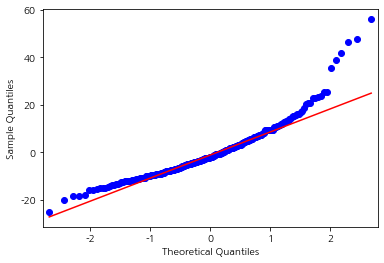

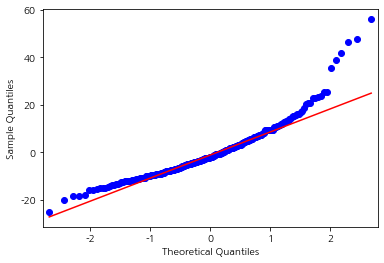

In [49]:
qqplot(reg_result.resid, line = 'q')

In [50]:
# RFE(reculsive feature elimination) 함수: 입력된 모델 이용, 변수중요도 낮은 순으로 순차적 제거.

# sklearn의 선형회귀 모델.
model = LinearRegression()

# 전체 변수 중 5개의 변수가 남을 때까지 변수 선택
# rfe = RFE(model, 5)
# rfe = rfe.fit(df_train_x, df_train_y)
rfe = RFE(model, n_features_to_select= 5).fit(df_train_x, df_train_y)

# 선택된 변수
selected_cols = df_train_x.columns[rfe.support_] # support_는 명령어래. 선택된 변수를 알려주는 코드.

# 제거된 변수
removed_cols = df_train_x.columns[~rfe.support_]

print("Selected Variables : {}".format(selected_cols))
print("Removed Variables : {}".format(removed_cols))

Selected Variables : Index(['O3', 'CO', 'Month_3', 'Month_4', 'direction_3divider_0'], dtype='object')
Removed Variables : Index(['NO2', 'SO2', 'TEMP', 'RAIN', 'WIND', 'HUMIDITY', 'ATM_PRESS', 'SNOW',
       'CLOUD', 'Month_1', 'Month_2', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'direction_3divider_1', 'direction_3divider_2'],
      dtype='object')


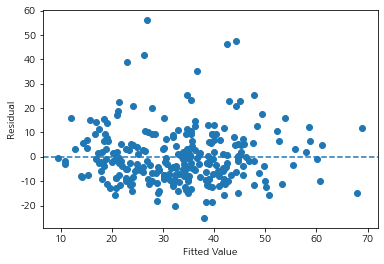

In [51]:
# 잔차의 등분산성: X-예측값, Y-잔차
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel('Fitted Value')
plt.ylabel('Residual')
plt.axhline(y = 0, linestyle = "--") # y = 0인 직선을 --점선으로 그으라는 

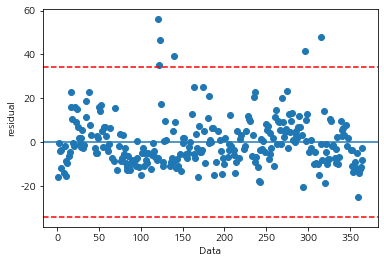

In [52]:
# 독립성 검정. 관리도를 그려서(이상치 판독할 때 잠깐 얘기했던)
plt.scatter(df_train.index, reg_result.resid, marker = 'o')
plt.xlabel('Data')
plt.ylabel('residual')
plt.axhline(y = 0, linestyle = '-')
plt.axhline(y = 3*np.std(reg_result.resid), linestyle = '--', color = 'red') # 3*표준편차를 기준으로 선을 긋고,
plt.axhline(y = -3*np.std(reg_result.resid), linestyle = '--', color = 'red')
# UCL, LCL 넘어가는 이상치 없으므로 독립성이 존재한다.

In [53]:
import warnings 
warnings.filterwarnings(action='ignore')

# 의사결정나무 예측 모델

In [54]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 365
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   MeasDate            365 non-null    object        
 1   PM10                365 non-null    float64       
 2   O3                  365 non-null    float64       
 3   NO2                 365 non-null    float64       
 4   CO                  365 non-null    float64       
 5   SO2                 365 non-null    float64       
 6   TEMP                365 non-null    float64       
 7   RAIN                365 non-null    float64       
 8   WIND                365 non-null    float64       
 9   WIND_DIR            365 non-null    float64       
 10  HUMIDITY            365 non-null    float64       
 11  ATM_PRESS           365 non-null    float64       
 12  SNOW                365 non-null    float64       
 13  CLOUD               365 non-null    float64       

In [55]:
df_raw = pd.read_csv('./AIR_POLLUTION.csv')

df_raw['DateInfo'] = pd.to_datetime(df_raw['MeasDate'], infer_datetime_format= True)
df_raw['Year'] = df_raw['DateInfo'].dt.year
df_raw['Month'] = df_raw['DateInfo'].dt.month

df_raw.drop(['MeasDate', 'DateInfo'], axis=1, inplace= True)


df_raw['CO'].fillna(method='bfill', inplace= True)
delete_row = df_raw[df_raw['PM10'].isnull()].index
df_raw.drop(delete_row, inplace= True)

# 목표변수, 설명변수 데이터 지정
df_raw_y = df_raw['PM10']
df_raw_x = df_raw.drop('PM10', axis = 1, inplace=False)

In [56]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 365
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PM10       365 non-null    float64
 1   O3         365 non-null    float64
 2   NO2        365 non-null    float64
 3   CO         365 non-null    float64
 4   SO2        365 non-null    float64
 5   TEMP       365 non-null    float64
 6   RAIN       365 non-null    float64
 7   WIND       365 non-null    float64
 8   WIND_DIR   365 non-null    int64  
 9   HUMIDITY   365 non-null    float64
 10  ATM_PRESS  365 non-null    float64
 11  SNOW       365 non-null    float64
 12  CLOUD      365 non-null    float64
 13  Year       365 non-null    int64  
 14  Month      365 non-null    int64  
dtypes: float64(12), int64(3)
memory usage: 45.6 KB


In [57]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y,
                                                               test_size=0.3, random_state = 1234)

# 모델 생성
tree_uncustom = DecisionTreeRegressor(random_state = 1234)
tree_uncustom.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print(tree_uncustom.score(df_train_x, df_train_y))

# Test 데이터 설명력
print(tree_uncustom.score(df_test_x, df_test_y))

1.0
-0.22483238453473042


In [58]:
train_score = [] ; test_score = []


# min_sample_leaf: 잎사귀 최소 자료 수     * 참조: para_leaf : [1,2,3,...,19]
para_leaf = [n_leaf * 1 for n_leaf in range(1, 20)]

for v_min_sample_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=v_min_sample_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSmaplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

# 모델 설명력 확인
df_score_leaf.round(3)

,MinSmaplesLeaf,TrainScore,TestScore
0,1,1.000,-0.225
1,2,0.932,-0.001
2,3,0.866,0.063
3,4,0.825,0.362
4,5,0.753,0.372
5,6,0.736,0.281
6,7,0.703,0.334
7,8,0.660,0.347
8,9,0.639,0.379
9,10,0.629,0.368


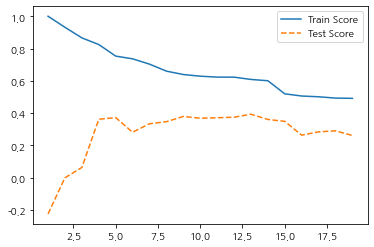

In [59]:
plt.plot(para_leaf, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle = '--', label = 'Test Score')
plt.legend()

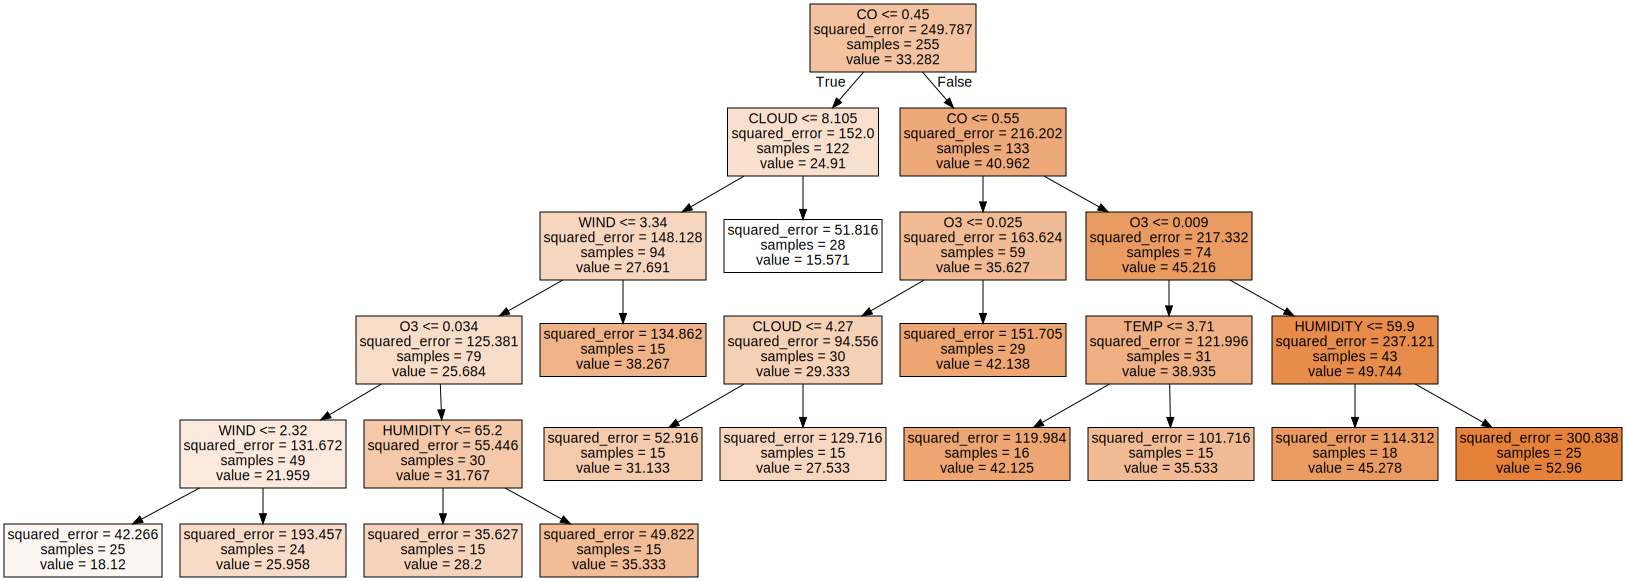

In [60]:
# 변수명 저장
v_feature_name = df_train_x.columns

# 입사귀 노드의 최소 자료수 = 8번 모델
tree_graph = DecisionTreeRegressor(min_samples_leaf=15, random_state=1234)
tree_graph.fit(df_train_x, df_train_y)

# tree_leaf.dot 파일 생성 (트리 구조 생성 및 저장) : 모델 시각화
export_graphviz(tree_graph, out_file='tree_leaf.dot',
               feature_names = v_feature_name, impurity = True, filled=True) # filled 옵션은 트리 색깔 반영할지

with open('tree_leaf.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [61]:
# train 및 test 설명력 결과 저장
train_score = [] ; test_score = []


# min_sample_split: 분리 노드의 최소 자료 수     * 참조: para_leaf : [4,6,8, ..., 38]
para_split = [n_split * 2 for n_split in range(1, 100)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=15,
                                min_samples_split=v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 결과 저장
df_score_split = pd.DataFrame()
df_score_split['MinSmaplesLeaf'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

# 모델 설명력 확인
df_score_split.round(3)

,MinSmaplesLeaf,TrainScore,TestScore
0,2,0.519,0.349
1,4,0.519,0.349
2,6,0.519,0.349
3,8,0.519,0.349
4,10,0.519,0.349
...,...,...,...
94,190,0.257,0.221
95,192,0.257,0.221
96,194,0.257,0.221
97,196,0.257,0.221


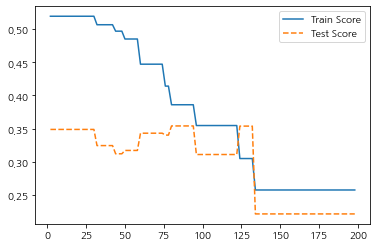

In [62]:
# 모델 설명력 그래프

plt.plot(para_split, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_split, test_score, linestyle = '--', label = 'Test Score')
plt.legend()

In [63]:
# train 및 test 설명력 결과 저장
train_score = [] ; test_score = []


# min_sample_split: 분리 노드의 최소 자료 수     * 참조: para_leaf : [4,6,8, ..., 38]
para_split = [n_split * 1 for n_split in range(80, 130)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=15,
                                min_samples_split=v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 결과 저장
df_score_split = pd.DataFrame()
df_score_split['MinSmaplesLeaf'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

# 모델 설명력 확인
df_score_split.round(3)

,MinSmaplesLeaf,TrainScore,TestScore
0,80,0.386,0.354
1,81,0.386,0.354
2,82,0.386,0.354
3,83,0.386,0.354
4,84,0.386,0.354
5,85,0.386,0.354
6,86,0.386,0.354
7,87,0.386,0.354
8,88,0.386,0.354
9,89,0.386,0.354


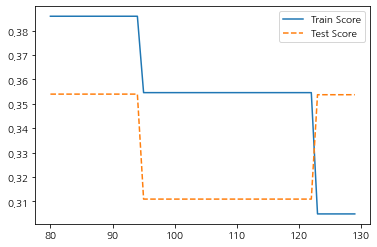

In [64]:
# 모델 설명력 그래프

plt.plot(para_split, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_split, test_score, linestyle = '--', label = 'Test Score')
plt.legend()

In [65]:
# train 및 test 설명력 결과 저장
train_score = [] ; test_score = []


# max_dapth: 최대 깊이 변경     * 참조: para_depth : [1, 2, 3, ... , 10] para_depth에서 para는 패러미터 의미
para_depth = [depth for depth in range(1, 20)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=15,
                                min_samples_split=80, max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 결과 저장
df_score_depth = pd.DataFrame()
df_score_depth['MaxDepth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

# 모델 설명력 확인
df_score_depth.round(3)

,MaxDepth,TrainScore,TestScore
0,1,0.257,0.221
1,2,0.355,0.311
2,3,0.386,0.354
3,4,0.386,0.354
4,5,0.386,0.354
5,6,0.386,0.354
6,7,0.386,0.354
7,8,0.386,0.354
8,9,0.386,0.354
9,10,0.386,0.354


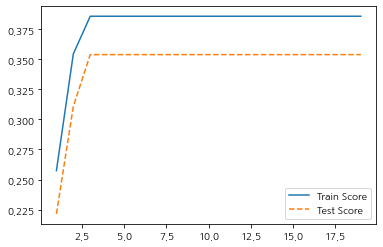

In [66]:
# 모델 설명력 그래프

plt.plot(para_depth, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_depth, test_score, linestyle = '--', label = 'Test Score')
plt.legend()

In [67]:
tree_final = DecisionTreeRegressor(min_samples_leaf=12, min_samples_split=90,
                                  max_depth=4, random_state=1234)

tree_final.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print(tree_final.score(df_train_x, df_train_y))

# Test
print(tree_final.score(df_test_x, df_test_y))

0.3865274765084692
0.3684253417872624


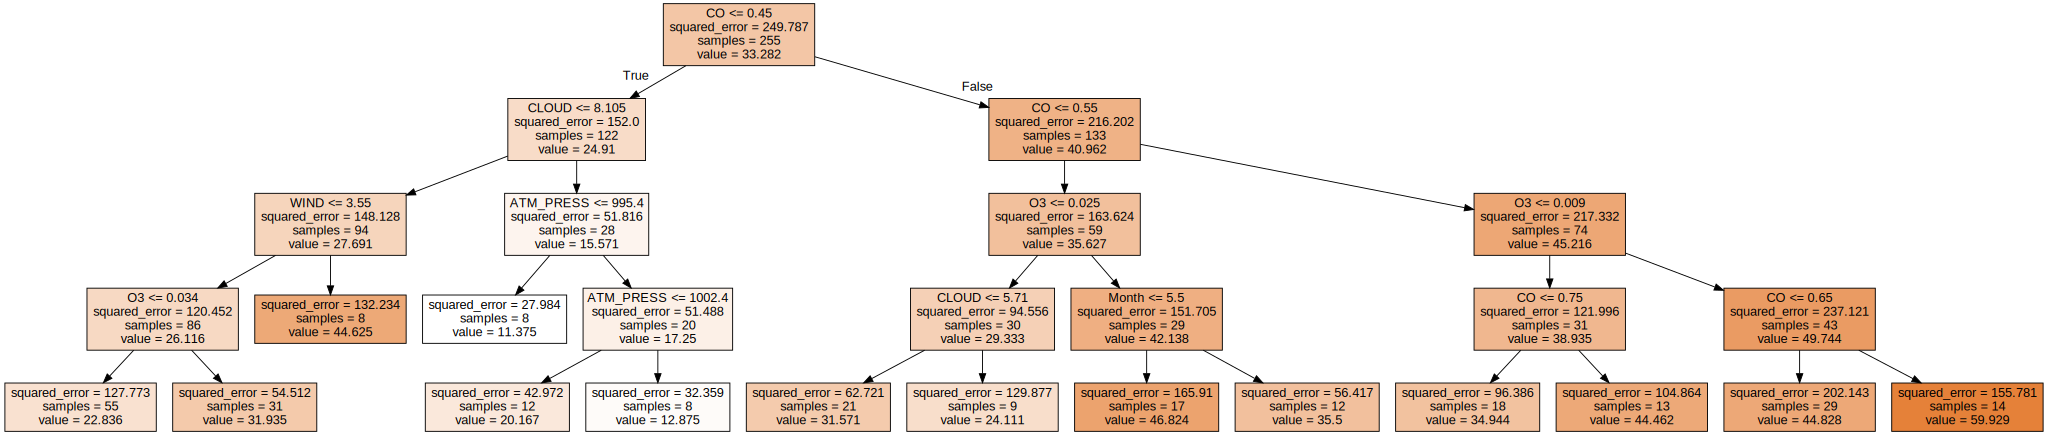

In [68]:
# 최종모델 시각화

export_graphviz(tree_graph, out_file='tree_final.dot',
               feature_names = v_feature_name, impurity = True, filled=True) # filled 옵션은 트리 색깔 반영할지

with open('tree_split.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [69]:
para_leaf = [n_leaf * 1 for n_leaf in range(13, 16)]
para_split = [n_split * 1 for n_split in range(80, 110)]
para_depth = [depth for depth in range(1, 5)]

estimator = DecisionTreeRegressor()

# 구하고자 하는 parameter와 범위
param_grid = {'criterion': ['mse', 'friedman_mse', 'mae'],
             'max_features': ['auto', 'sqrt', 'log2'],
             'max_depth': para_depth, 'min_samples_split': para_split,
             'min_samples_leaf': para_leaf}

# 설명력 높은 최적 패러미터 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring='r2', n_jobs=-1)
grid_dt.fit(df_train_x, df_train_y)

print('best estimator model : \n{}'.format(grid_dt.best_estimator_))
print('\nbest parameter : \n{}'.format(grid_dt.best_params_))
print('\nbest score : \n{}'.format(grid_dt.best_score_.round(3)))

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-pack

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-pack

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-pack

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-pack

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-pack

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-pack

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-pack

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-pack

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-pack

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-pack

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-pack

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-pack

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-pack

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-pack

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-pack

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-pack

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-pack

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-pack

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-pack

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-pack

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-pack

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-

best estimator model : 
DecisionTreeRegressor(criterion='mse', max_depth=4, max_features='log2',
                      min_samples_leaf=15, min_samples_split=106)

best parameter : 
{'criterion': 'mse', 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 15, 'min_samples_split': 106}

best score : 
0.302


/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-

In [70]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

# df_feature_importce의 테이블을 중요도별로 정렬
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
2,CO,0.789
11,CLOUD,0.129
6,WIND,0.083
0,O3,0.000
1,NO2,0.000
3,SO2,0.000
4,TEMP,0.000
5,RAIN,0.000
7,WIND_DIR,0.000
8,HUMIDITY,0.000


Text(0, 0.5, '변수')

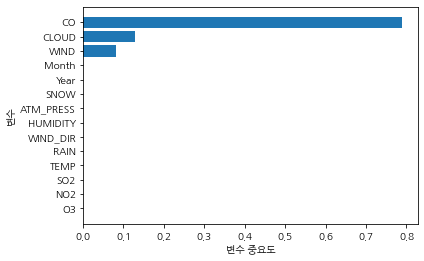

In [71]:
# 설명변수 중요도 그래프, 중요도가 높은 변수를 상위에 그림.
df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

# Decision Tree

In [73]:
# 최종모델
rf_final = RFR(n_estimators = 100, min_samples_leaf=3, min_samples_split=6,
                                  max_depth=3, random_state=1234)

rf_final.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print(rf_final.score(df_train_x, df_train_y))

# Test
print(rf_final.score(df_test_x, df_test_y))

0.5788396699217082
0.4621498347556513


# Random Forest